# 숙명여자대학교 기계시스템학부 딥러닝 2024: Lab0, Lab1
## (강사: 심주용)

* [Lab0: Colab & Pytorch Basic](#section1)
* [Lab1: Optimization and ANN](#section2)
  * [Optimization of Linear Regression](#section3)
  * [ANN Decision Boundary Visualization](#section4)
  * [Universal Approximation Theorem](#section5)
  * [ANN for MNIST](#section6)

<a name="section1"></a>
# Lab0: Colab & Pytorch Basic

In [ ]:
!head /proc/cpuinfo

processor	: 0
vendor_id	: AuthenticAMD
cpu family	: 23
model		: 49
model name	: AMD EPYC 7B12
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2249.998
cache size	: 512 KB
physical id	: 0


In [ ]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       1.4Gi       8.0Gi       1.0Mi       3.3Gi        10Gi
Swap:             0B          0B          0B


In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   25G   84G  23% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G  4.0K  5.8G   1% /dev/shm
/dev/root       2.0G  1.1G  849M  57% /usr/sbin/docker-init
tmpfs           6.4G  564K  6.4G   1% /var/colab
/dev/sda1        70G   43G   27G  62% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


### Google Colab Setup: Google Drive
Next we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.

Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.

In [ ]:
# prompt: Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## Pytorch Introduction

[PyTorch](https://pytorch.org/) is an open source machine learning framework. At its core, PyTorch provides a few key features:

- A multidimensional **Tensor** object, similar to [numpy](https://numpy.org/) but with GPU accelleration.
- An optimized **autograd** engine for automatically computing derivatives
- A clean, modular API for building and deploying **deep learning models**

We will use PyTorch for all programming assignments throughout the semester. This notebook will focus on the **Tensor API**, as it is the main part of PyTorch that we will use for the first few assignments.

You can find more information about PyTorch by following one of the [oficial tutorials](https://pytorch.org/tutorials/) or by [reading the documentation](https://pytorch.org/docs/stable/).

To use PyTorch, we first need to import the `torch` package.

We also check the version; the assignments in this course will use PyTorch verion 1.10.0, since this is the default version in Google Colab.

In [ ]:
import torch
print(torch.__version__)

2.2.1+cu121


## Pytorch Basic - Table of Contents
We are going to cover 4 and 6. If needed, please refer this tutorial:

https://github.com/jooyongsim/deeplearning_SMWU_2024/blob/main/notebooks/Lab0_pytorch101_Class.ipynb

1. Tensor Basics
-  Creating and accessing tensors
- Tensor constructors
- Data Types
2. Tensor Indexing
- Slice Indexing
- Integer tensor indexing
- Boolean tensor indexing
3. Reshaping operations
- View
- Swapping axes
- Contigous tensors
4. Tensor operations
- Elementwise operations
- Reduction operations
- Matrix operations
- Vectorization
5. Broadcating
6. Running on GPU

### Reduction operations

So far we've seen basic arithmetic operations on tensors that operate elementwise. We may sometimes want to perform operations that aggregate over part or all of a tensor, such as a summation; these are called **reduction** operations.

Like the elementwise operations above, most reduction operations are available both as functions in the `torch` module and as instance methods on `tensor` objects.

The simplest reduction operation is summation. We can use the [`.sum()`](https://pytorch.org/docs/stable/generated/torch.Tensor.sum.html) method (or eqivalently [`torch.sum`](https://pytorch.org/docs/stable/generated/torch.sum.html)) to reduce either an entire tensor, or to reduce along only one dimension of the tensor using the `dim` argument:

In [ ]:
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.float32)
x.sum(dim=0)

tensor([5., 7., 9.])

Other useful reduction operations include [`mean`](https://pytorch.org/docs/stable/generated/torch.mean.html), [`min`](https://pytorch.org/docs/stable/generated/torch.min.html), and [`max`](https://pytorch.org/docs/stable/generated/torch.max.html). You can find a full list of all available reduction operations [in the documentation](https://pytorch.org/docs/stable/torch.html#reduction-ops).

Some reduction operations return more than one value; for example `min` returns both the minimum value over the specified dimension, as well as the index where the minimum value occurs:

In [ ]:
x = torch.tensor([[2, 4, 3, 5], [3, 3, 5, 2]], dtype=torch.float32)
print('Original tensor:')
print(x, x.shape)

# Finding the overall minimum only returns a single value
print('\nOverall minimum: ', x.min())

# Compute the minimum along each column; we get both the value and location:
# The minimum of the first column is 2, and it appears at index 0;
# the minimum of the second column is 3 and it appears at index 1; etc
col_min_vals, col_min_idxs = x.min(dim=0)
print('\nMinimum along each column:')
print('values:', col_min_vals)
print('idxs:', col_min_idxs)

Original tensor:
tensor([[2., 4., 3., 5.],
        [3., 3., 5., 2.]]) torch.Size([2, 4])

Overall minimum:  tensor(2.)

Minimum along each column:
values: tensor([2., 3., 3., 2.])
idxs: tensor([0, 1, 0, 1])


**Your turn**: Implement a code to set the minimum value along each row of a tensor to zero. You should use reduction and indexing operations, and you should not use any explicit loops.

Hint: [`clone`](https://pytorch.org/docs/stable/generated/torch.Tensor.clone.html), [`argmin`](https://pytorch.org/docs/stable/generated/torch.Tensor.argmin.html)

In [ ]:
x0 = torch.tensor([[10, 20, 30], [2, 5, 1]])
print('Here is x0:')
print(x0)

def zero_row_min(x):
    y = None
    return y

y0 = zero_row_min(x0)
print('Here is y0:')
print(y0)
expected = [[0, 20, 30], [2, 5, 0]]


Here is x0:
tensor([[10, 20, 30],
        [ 2,  5,  1]])
Here is y0:
None


### Matrix operations

Note that unlike MATLAB, * is elementwise multiplication, not matrix multiplication. PyTorch provides a number of linear algebra functions that compute different types of vector and matrix products. The most commonly used are:

- [`torch.dot`](https://pytorch.org/docs/stable/generated/torch.dot.html): Computes inner product of vectors
- [`torch.mm`](https://pytorch.org/docs/stable/generated/torch.mm.html): Computes matrix-matrix products
- [`torch.mv`](https://pytorch.org/docs/stable/generated/torch.mv.html): Computes matrix-vector products
- [`torch.addmm`](https://pytorch.org/docs/stable/generated/torch.addmm.html) / [`torch.addmv`](https://pytorch.org/docs/stable/generated/torch.addmv.html): Computes matrix-matrix and matrix-vector multiplications plus a bias
- [`torch.bmm`](https://pytorch.org/docs/stable/generated/torch.bmm.html) / [`torch.baddmm`](https://pytorch.org/docs/stable/generated/torch.baddbmm.html): Batched versions of `torch.mm` and `torch.addmm`, respectively
- [`torch.matmul`](https://pytorch.org/docs/stable/generated/torch.matmul.html): General matrix product that performs different operations depending on the rank of the inputs. Confusingly, this is similar to `np.dot` in numpy.

You can find a full list of the available linear algebra operators [in the documentation](https://pytorch.org/docs/stable/torch.html#blas-and-lapack-operations).
All of these functions are also available as Tensor instance methods, e.g. [`Tensor.dot`](https://pytorch.org/docs/stable/generated/torch.Tensor.dot.html) instead of `torch.dot`.

Here is an example of using `torch.dot` to compute inner products. Like the other mathematical operators we've seen, most linear algebra operators are available both as functions in the `torch` module and as instance methods of tensors:

In [ ]:
def batched_matrix_multiply_loop(x,y):
    z = torch.zeros(x.shape[0], x.shape[1], y.shape[2])
    for i, (xi, yi) in enumerate(zip(x,y)):
      z[i] = torch.mm(xi,yi)
    return z

def batched_matrix_multiply_noloop(x,y):
    z = torch.bmm(x,y)
    return z

B, N, M, P = 2, 3, 5, 4
x = torch.randn(B, N, M)
y = torch.randn(B, M, P)
z_expected = torch.stack([x[0] @ y[0], x[1] @ y[1]])

z1 = batched_matrix_multiply_loop(x, y)
z2 = batched_matrix_multiply_noloop(x, y)
z1, z2, z_expected

(tensor([[[ 2.7758,  0.1319, -1.0618,  1.0290],
          [ 0.2477, -0.9766, -1.4088,  0.0800],
          [ 1.2295, -3.0038, -1.0355, -0.1734]],
 
         [[ 0.7379,  2.9394,  0.5514, -1.5638],
          [-0.1091,  0.2569,  3.3199,  1.8753],
          [ 1.8741,  5.0635,  3.9775, -4.0005]]]),
 tensor([[[ 2.7758,  0.1319, -1.0618,  1.0290],
          [ 0.2477, -0.9766, -1.4088,  0.0800],
          [ 1.2295, -3.0038, -1.0355, -0.1734]],
 
         [[ 0.7379,  2.9394,  0.5514, -1.5638],
          [-0.1091,  0.2569,  3.3199,  1.8753],
          [ 1.8741,  5.0635,  3.9775, -4.0005]]]),
 tensor([[[ 2.7758,  0.1319, -1.0618,  1.0290],
          [ 0.2477, -0.9766, -1.4088,  0.0800],
          [ 1.2295, -3.0038, -1.0355, -0.1734]],
 
         [[ 0.7379,  2.9394,  0.5514, -1.5638],
          [-0.1091,  0.2569,  3.3199,  1.8753],
          [ 1.8741,  5.0635,  3.9775, -4.0005]]]))

### Broadcasting
Broadcasting is a powerful mechanism that allows PyTorch to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller tensor and a larger tensor, and we want to use the smaller tensor multiple times to perform some operation on the larger tensor.

For example, suppose that we want to add a constant vector to each row of a tensor. We could do it like this:


In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
y = torch.zeros_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")
print(f"Shape of v: {v.shape}")

print(y)

Shape of x: torch.Size([4, 3])
Shape of y: torch.Size([4, 3])
Shape of v: torch.Size([3])
tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


This works; however when the tensor x is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the tensor x is equivalent to forming a tensor vv by stacking multiple copies of v vertically, then performing elementwise summation of x and vv. We could implement this approach like this:


In [ ]:
vv = v.repeat((4, 1))  # Stack 4 copies of v on top of each other
print(vv)              # Prints "[[1 0 1]
                       #          [1 0 1]
                       #          [1 0 1]
                       #          [1 0 1]]"

tensor([[1, 0, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1]])


In [ ]:
y = x + vv  # Add x and vv elementwise
print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")
print(f"Shape of vv: {vv.shape}")

print(y)

Shape of x: torch.Size([4, 3])
Shape of y: torch.Size([4, 3])
Shape of vv: torch.Size([4, 3])
tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


The line y = x + v works even though x has shape (4, 3) and v has shape (3,) due to broadcasting; this line works as if v actually had shape (4, 3), where each row was a copy of v, and the sum was performed elementwise.

Broadcasting two tensors together follows these rules:

1.   If the tensors do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2.   The two tensors are said to be *compatible* in a dimension if they have the same size in the dimension, or if one of the tensors has size 1 in that dimension.
3.   The tensors can be broadcast together if they are compatible in all dimensions.
4.   After broadcasting, each tensor behaves as if it had shape equal to the elementwise maximum of shapes of the two input tensors.
5.   In any dimension where one tensor had size 1 and the other tensor had size greater than 1, the first tensor behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](https://pytorch.org/docs/stable/notes/broadcasting.html).

Broadcasting usually happens implicitly inside many PyTorch operators. However we can also broadcast explicitly using the function [`torch.broadcast_tensors`](https://pytorch.org/docs/stable/generated/torch.broadcast_tensors.html#torch.broadcast_tensors):

In [ ]:
y = x + v

print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")
print(f"Shape of v: {v.shape}")

print(y)

Shape of x: torch.Size([4, 3])
Shape of y: torch.Size([4, 3])
Shape of v: torch.Size([3])
tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


In [ ]:
vv = v.reshape((1,3))
y = x + vv

print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")
print(f"Shape of vv: {vv.shape}")

print(y)

Shape of x: torch.Size([4, 3])
Shape of y: torch.Size([4, 3])
Shape of vv: torch.Size([1, 3])
tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


In [ ]:
vv = v.reshape((3,1))
y = x + vv

print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")
print(f"Shape of vv: {vv.shape}")

print(y)

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
w = torch.tensor([4, 5])                  # w has shape (2,)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(w)

# x has shape (2, 3) and w has shape (2,). We reshape w to (2, 1);
# then when we add the two the result broadcasts to (2, 3):
print('\nAdd the vector to each column of the matrix:')
print(x + w.view(-1, 1))

# Another solution is the following:
# 1. Transpose x so it has shape (3, 2)
# 2. Since w has shape (2,), adding will broadcast to (3, 2)
# 3. Transpose the result, resulting in a shape (2, 3)
print((x.t() + w).t())

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([4, 5])

Add the vector to each column of the matrix:
tensor([[ 5,  6,  7],
        [ 9, 10, 11]])
tensor([[ 5,  6,  7],
        [ 9, 10, 11]])


#### Multiply a tensor by a set of constants

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
c = torch.tensor([1, 10, 11, 100])        # c has shape (4)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(c)

# We do the following:
# 1. Reshape c from (4,) to (4, 1, 1)
# 2. x has shape (2, 3). Since they have different ranks, when we multiply the
#    two, x behaves as if its shape were (1, 2, 3)
# 3. The result of the broadcast multiplication between tensor of shape
#    (4, 1, 1) and (1, 2, 3) has shape (4, 2, 3)
# 4. The result y has shape (4, 2, 3), and y[i] (shape (2, 3)) is equal to
#    c[i] * x
y = c.view(-1, 1, 1) * x
print('\nMultiply x by a set of constants:')
print(y)

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([  1,  10,  11, 100])

Multiply x by a set of constants:
tensor([[[  1,   2,   3],
         [  4,   5,   6]],

        [[ 10,  20,  30],
         [ 40,  50,  60]],

        [[ 11,  22,  33],
         [ 44,  55,  66]],

        [[100, 200, 300],
         [400, 500, 600]]])


### Running on GPU

**Note: this section requires a GPU! If you do not have a computer with a CUDA-enabled GPU, you can complete this portion of the notebook on Google Colab.**

One of the most important features of PyTorch is that it can use graphics processing units (GPUs) to accelerate its tensor operations.

We can easily check whether PyTorch is configured to use GPUs:

Tensors can be moved onto any device using the .to method.

In [ ]:
import torch

torch.cuda.is_available()


False

You can enable GPUs in Colab via Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU.

This may cause the Colab runtime to restart, so we will re-import torch in the next cell.

We have already seen that PyTorch tensors have a `dtype` attribute specifying their datatype. All PyTorch tensors also have a `device` attribute that specifies the device where the tensor is stored -- either CPU, or CUDA (for NVIDA GPUs). A tensor on a CUDA device will automatically use that device to accelerate all of its operations.

Just as with datatypes, we can use the [`.to()`](https://pytorch.org/docs/1.1.0/tensors.html#torch.Tensor.to) method to change the device of a tensor. We can also use the convenience methods `.cuda()` and `.cpu()` methods to move tensors between CPU and GPU.

In [ ]:
# Construct a tensor on the CPU
x0 = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print('x0 device:', x0.device)

# Move it to the GPU using .to()
x1 = x0.to('cuda')
print('x1 device:', x1.device)

<a name="section2"></a>
# Lab1: Optimization and ANN

<a name="section3"></a>
# Optimization of Linear Regression
## Mean Squared Error (MSE) Loss Function

$L = \frac{1}{N} \sum_{i=1}^{N} (y_{pred}^{(i)} - y^{(i)})^2$

Where $L$ is the loss function,
$N$ is the number of samples,
$y_{pred}^{(i)}$ is the predicted output for the $i^{th}$ sample,
$y^{(i)}$ is the actual output for the $i^{th}$ sample,
$w$ is the weight, and
$b$ is the bias.

## Gradients of the Loss Function

Gradient with respect to $w$:

$\frac{\partial L}{\partial w} = \frac{2}{N} \sum_{i=1}^{N} x^{(i)}(wx^{(i)} + b - y^{(i)})$

Gradient with respect to $b$:

$\frac{\partial L}{\partial b} = \frac{2}{N} \sum_{i=1}^{N} (wx^{(i)} + b - y^{(i)})$

## Gradient Update Equations
Update for $w$:
$w := w - \eta \frac{\partial L}{\partial w}$

Update for $b$:
$b := b - \eta \frac{\partial L}{\partial b}$

These update steps are iteratively applied over many epochs, aiming to minimize the loss function $L$ and converge to the optimal values of $w$ and $b$ for the best model fit.

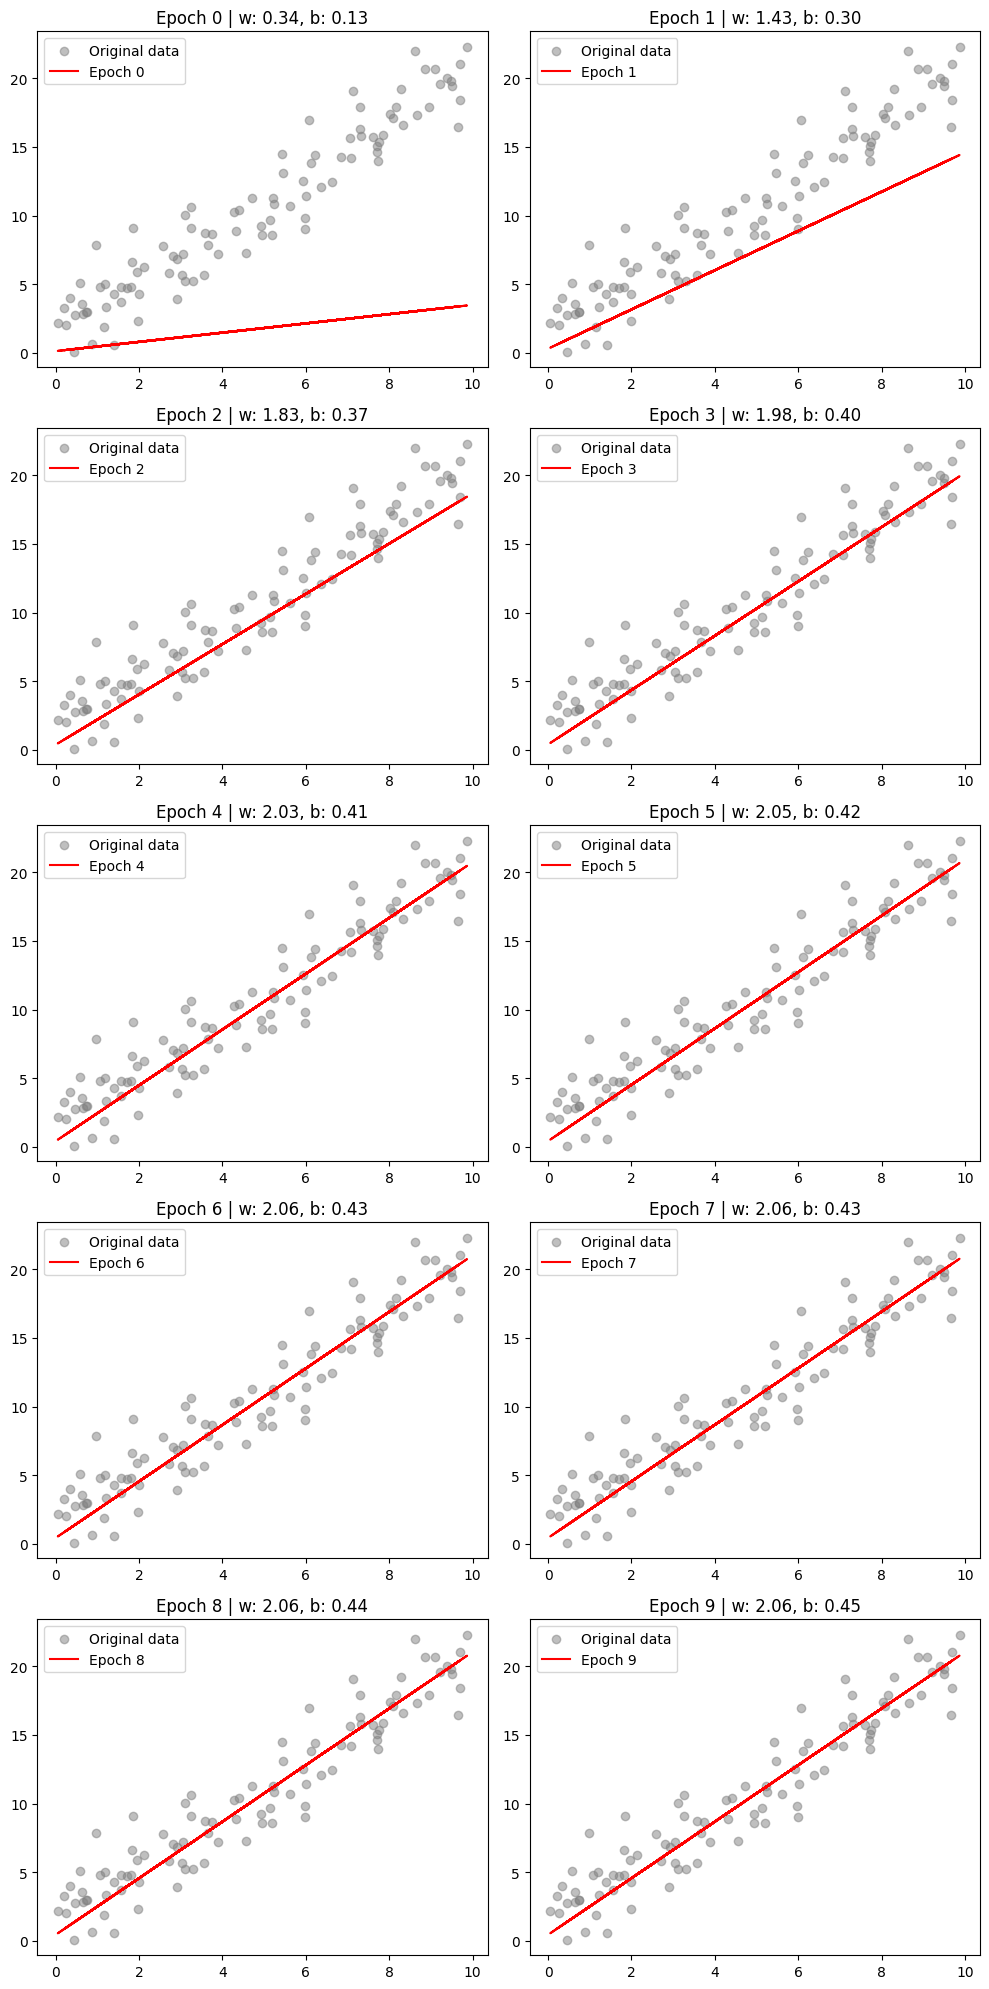

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic data
n_samples = 100
x = np.random.rand(n_samples, 1) * 10  # Features
y = 2 * x + 1 + np.random.randn(n_samples, 1) * 2  # Targets with noise

x_train = torch.tensor(x, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

# Initialize weights and bias with random values
w = torch.randn(1, dtype=torch.float32, requires_grad=False)
b = torch.randn(1, dtype=torch.float32, requires_grad=False)

# Learning rate
lr = 0.01

# Number of epochs
epochs = 10

# Number of subplots needed
plt.figure(figsize=(10, 20))

for epoch in range(epochs):

    if (epoch+1) % 1 == 0:
        plt.subplot(5, 2, epoch+1)
        with torch.no_grad():
            predicted = w * x_train + b
            plt.scatter(x, y, label='Original data', color='grey', alpha=0.5)
            plt.plot(x, predicted.numpy(), label=f'Epoch {epoch}', color='red')
            plt.title(f'Epoch {epoch} | w: {w.item():.2f}, b: {b.item():.2f}')
            plt.legend()

    # Forward pass: Compute predicted y by the equation y = wx + b
    y_pred = w * x_train + b

    # Compute and print loss using mean squared error
    loss = ((y_pred - y_train) ** 2).mean()

    # Manually compute gradients for our parameters (w and b)
    grad_w = 2.0 * (y_pred - y_train) * x_train
    grad_w = grad_w.mean()

    grad_b = 2.0 * (y_pred - y_train)
    grad_b = grad_b.mean()

    # Update weights using gradient descent
    w -= lr * grad_w
    b -= lr * grad_b


plt.tight_layout()
plt.show()


## Automatic Differentiation with PyTorch using .backward() fucntion
- Setting requires_grad=True for w and b to enable gradient tracking.

- Using .backward() to automatically compute gradients.

- Manually updating w and b within a torch.no_grad() context to prevent tracking these operations in the computation graph.

- Zeroing the gradients of w and b after each update to ensure gradients from previous epochs are not accumulated.

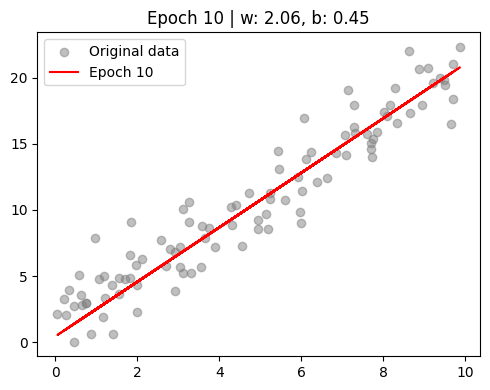

In [ ]:
# Set seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Initialize weights and bias with random values and set requires_grad=True to enable gradient computation
w = torch.randn(1, dtype=torch.float32, requires_grad=True)
b = torch.randn(1, dtype=torch.float32, requires_grad=True)

lr = 0.01 # Learning rate
epochs = 10 # Number of epochs

for epoch in range(epochs):
    # Forward pass: Compute predicted y by the equation y = wx + b
    y_pred = w * x_train + b

    # Compute and print loss using mean squared error
    loss = ((y_pred - y_train) ** 2).mean()

    # Use backward to automatically compute gradients
    loss.backward()

    # Update weights using gradient descent. Wrap in torch.no_grad() because weights have requires_grad=True, but we don't need to track this in autograd.
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    # Zero the gradients after updating
    w.grad.zero_()
    b.grad.zero_()


plt.figure(figsize=(5, 4))
with torch.no_grad():
    predicted = w * x_train + b
    plt.scatter(x, y, label='Original data', color='grey', alpha=0.5)
    plt.plot(x, predicted.numpy(), label=f'Epoch {epoch+1}', color='red')
    plt.title(f'Epoch {epoch+1} | w: {w.item():.2f}, b: {b.item():.2f}')
    plt.legend()
plt.tight_layout()
plt.show()


## PyTorch Optimizer
- Defining the model parameters (w and b) that the optimizer will update.
- Initializing the optimizer (torch.optim.SGD) with these parameters and the learning rate.
- Using optimizer.zero_grad() to clear the gradients before the backward pass.
- Replacing the manual update of w and b with optimizer.step(), which automatically applies the gradients.

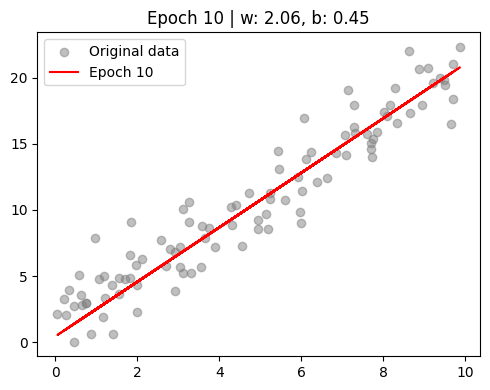

In [ ]:
# Set seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Initialize weights and bias with random values and set requires_grad=True to enable gradient computation
w = torch.randn(1, dtype=torch.float32, requires_grad=True)
b = torch.randn(1, dtype=torch.float32, requires_grad=True)

lr = 0.01 # Learning rate
epochs = 10 # Number of epochs

# Create the optimizer
optimizer = torch.optim.SGD([w, b], lr=lr)

for epoch in range(epochs):
    # necessary since PyTorch accumulates gradients
    optimizer.zero_grad()

    y_pred = w * x_train + b

    # Compute and print loss using mean squared error
    loss = ((y_pred - y_train) ** 2).mean()

    loss.backward()

    # Perform a single optimization step (parameter update)
    optimizer.step()

plt.figure(figsize=(5, 4))
with torch.no_grad():
    predicted = w * x_train + b
    plt.scatter(x, y, label='Original data', color='grey', alpha=0.5)
    plt.plot(x, predicted.numpy(), label=f'Epoch {epoch+1}', color='red')
    plt.title(f'Epoch {epoch+1} | w: {w.item():.2f}, b: {b.item():.2f}')
    plt.legend()
plt.tight_layout()
plt.show()

## PyTorch Loss Function
- Use torch.nn.functional.mse_loss.
- This change simplifies the loss computation step, as you no longer need to manually define the MSE loss.

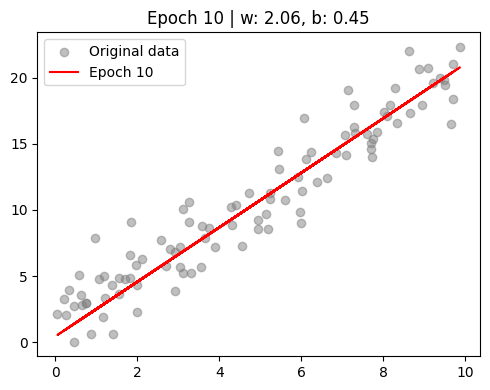

In [ ]:
# Set seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

import torch.nn.functional as F

w = torch.randn(1, dtype=torch.float32, requires_grad=True)
b = torch.randn(1, dtype=torch.float32, requires_grad=True)

lr = 0.01 # Learning rate
epochs = 10 # Number of epochs

# Define the optimizer
optimizer = torch.optim.SGD([w, b], lr=lr)

for epoch in range(epochs):
    optimizer.zero_grad() # Zero the gradients
    # Forward pass: Compute predicted y by the equation y = wx + b
    y_pred = w * x_train + b
    # Compute loss using PyTorch's MSE loss function
    loss = F.mse_loss(y_pred, y_train)
    # Backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()
    # Perform a single optimization step (parameter update)
    optimizer.step()

plt.figure(figsize=(5, 4))
with torch.no_grad():
    predicted = w * x_train + b
    plt.scatter(x, y, label='Original data', color='grey', alpha=0.5)
    plt.plot(x, predicted.numpy(), label=f'Epoch {epoch+1}', color='red')
    plt.title(f'Epoch {epoch+1} | w: {w.item():.2f}, b: {b.item():.2f}')
    plt.legend()
plt.tight_layout()
plt.show()


<a name="section4"></a>
# ANN Decision Boundary Visualization

- synthetic data for binary classification



### Data Generation:
The script starts by generating 1000 samples of two features, x1 and x2, using uniform random distributions. The range for x1 is set from -5 to 5, while for x2, it's from -4 to 4.
A decision function g is defined to categorize these samples into two classes, C1 and C0, based on whether their value is above or below 0, respectively.

The samples are then separated into two groups (X1 for C1 and X0 for C0) based on their class.
The input features (train_X) and labels (train_y) for the neural network are prepared by stacking the two groups' features and creating a binary label array, where C1 is labeled 1 and C0 is labeled 0.
A scatter plot visualizes the distribution of the two classes in the feature space.


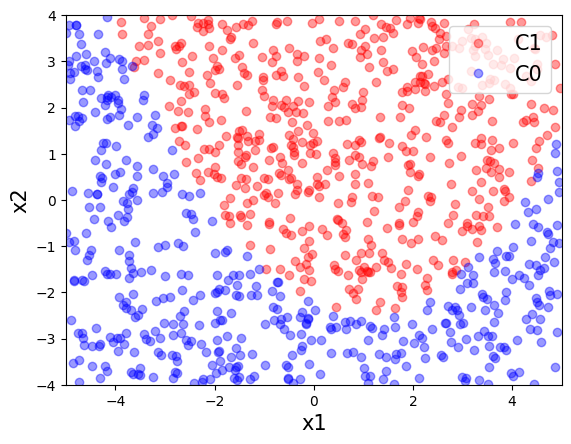

In [ ]:
# training data gerneration
import numpy as np
import matplotlib.pyplot as plt

m = 1000
x1 = 10*np.random.rand(m, 1) - 5
x2 = 8*np.random.rand(m, 1) - 4

g = - 0.5*(x1-1)**2 + 2*x2 + 5

C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]
N = C1.shape[0]
M = C0.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_X = np.array(train_X)
train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])

plt.figure()
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'x1', fontsize = 15)
plt.ylabel(r'x2', fontsize = 15)
plt.xlim([-5, 5])
plt.ylim([-4, 4])
plt.show()


### Model Definition:
A simple feedforward neural network with two linear layers separated by a sigmoid activation function is defined using PyTorch's Sequential API. The network takes two features as input and outputs a single value passed through a sigmoid function to represent the probability of belonging to class C1.
The Adam optimizer and binary cross-entropy loss function are set up for training the model.

### Training:
The input data and labels are converted to PyTorch tensors.
The model is trained in a loop for 100 epochs, printing the loss at each epoch.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model using Sequential
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=2),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1),
    nn.Sigmoid()
)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Define the loss function
loss_function = nn.BCELoss()

# Assuming train_X and train_y are your data tensors and are of appropriate type and shape
# Convert datasets to tensor if not already, and ensure they are floats for the inputs and floats for the labels (for BCELoss)
train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.FloatTensor(train_y).view(-1, 1)  # Ensuring the target tensor has the correct shape

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    output = model(train_X_tensor)
    loss = loss_function(output, train_y_tensor)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


Epoch 1, Loss: 0.7238544225692749
Epoch 2, Loss: 0.6941696405410767
Epoch 3, Loss: 0.6736449003219604
Epoch 4, Loss: 0.6580097675323486
Epoch 5, Loss: 0.6409046649932861
Epoch 6, Loss: 0.6205635666847229
Epoch 7, Loss: 0.5978749394416809
Epoch 8, Loss: 0.5743526816368103
Epoch 9, Loss: 0.55117267370224
Epoch 10, Loss: 0.5291633009910583
Epoch 11, Loss: 0.5089812874794006
Epoch 12, Loss: 0.49113860726356506
Epoch 13, Loss: 0.47589004039764404
Epoch 14, Loss: 0.4631611406803131
Epoch 15, Loss: 0.4526442885398865
Epoch 16, Loss: 0.44398242235183716
Epoch 17, Loss: 0.43688878417015076
Epoch 18, Loss: 0.43116551637649536
Epoch 19, Loss: 0.426665335893631
Epoch 20, Loss: 0.42324212193489075
Epoch 21, Loss: 0.42071640491485596
Epoch 22, Loss: 0.41886237263679504
Epoch 23, Loss: 0.41741541028022766
Epoch 24, Loss: 0.4160875678062439
Epoch 25, Loss: 0.4145784378051758
Epoch 26, Loss: 0.41257843375205994
Epoch 27, Loss: 0.4097774028778076
Epoch 28, Loss: 0.40589189529418945
Epoch 29, Loss: 0.400


### Visualization of Model's Internal Representations and Decision Boundary:
The trained model's weights and biases are extracted to compute the activations and logits manually for the input data.
Two subplots visualize the logits and activations (after applying the sigmoid function) of the training data, colored by class. These plots help understand how the model is transforming the input data internally.
A line representing the model's decision boundary in the space of activations is computed and plotted. The boundary separates the two classes based on the model's learned weights and biases.

Overall, this code demonstrates not only how to train a simple neural network for a binary classification task using PyTorch but also offers insights into the model's internal transformations and decision-making process through visualization.

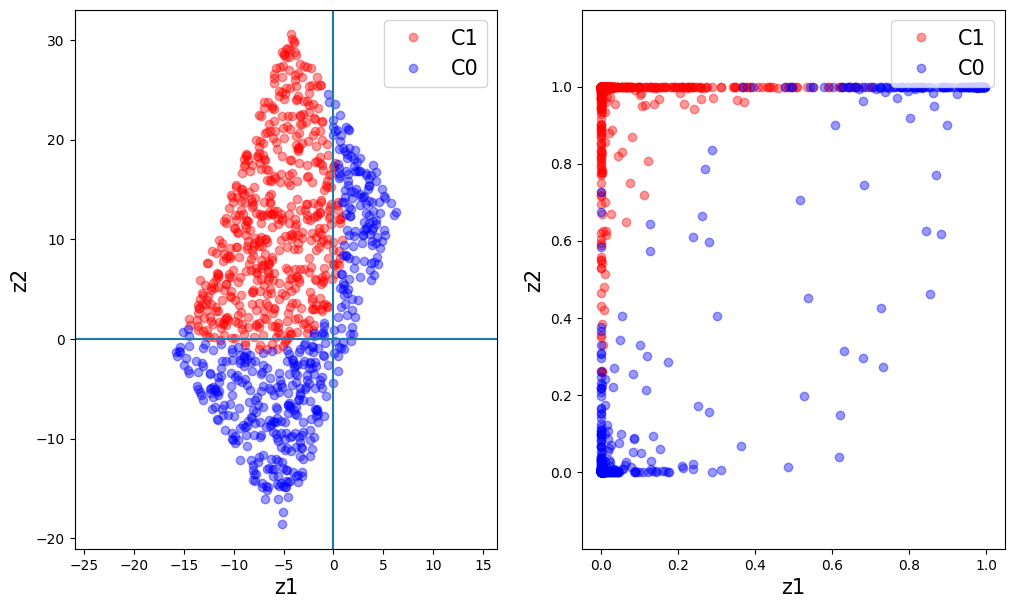

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Assuming model is your trained PyTorch model and train_X is your input tensor

# Extracting weights and biases from the PyTorch model
w1, b1 = model[0].weight.data.numpy(), model[0].bias.data.numpy()
w2, b2 = model[2].weight.data.numpy(), model[2].bias.data.numpy()

# Converting train_X to a numpy array for matrix operations
X = train_X

# Calculating logits manually
logits = np.dot(X, w1.T) + b1

# Applying the sigmoid function to logits
H = 1 / (1 + np.exp(-logits))

# Plotting
plt.figure(figsize=(12, 7))

plt.subplot(121)
plt.plot(logits[:N, 0], logits[:N, 1], 'ro', alpha=0.4, label='C1')
plt.plot(logits[N:m, 0], logits[N:m, 1], 'bo', alpha=0.4, label='C0')
plt.xlabel('z1', fontsize=15)
plt.ylabel('z2', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.axis('equal')
plt.axhline(0)
plt.axvline(0)

plt.subplot(122)
plt.plot(H[:N, 0], H[:N, 1], 'ro', alpha=0.4, label='C1')
plt.plot(H[N:m, 0], H[N:m, 1], 'bo', alpha=0.4, label='C0')
plt.xlabel('z1', fontsize=15)
plt.ylabel('z2', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.axis('equal')
plt.show()

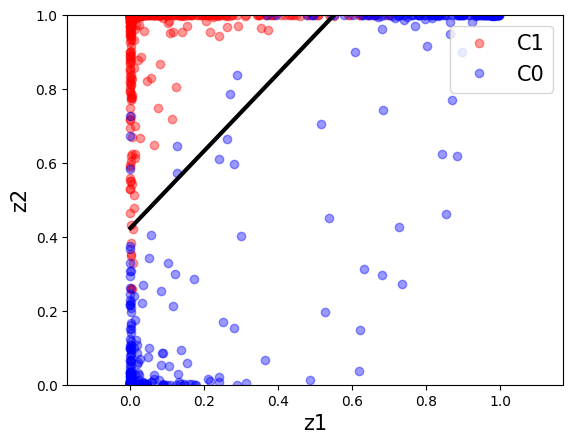

In [ ]:
x1p = np.arange(0, 1, 0.01).reshape(-1, 1)
x2p = - w2[0,0]/w2[0,1]*x1p - b2[0]/w2[0,1]

plt.figure()
plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.xlabel('z1', fontsize = 15)
plt.ylabel('z2', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()


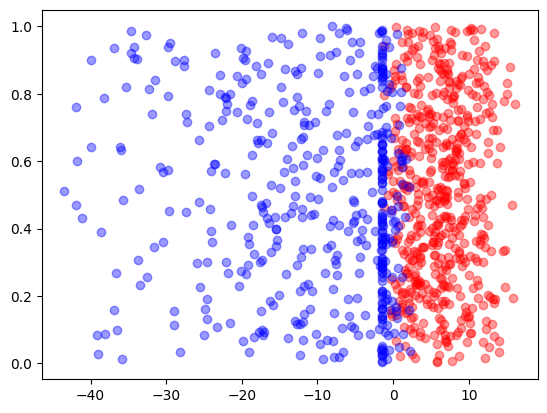

In [ ]:
z = w2[0,0]*H[:,0] + w2[0,1]*H[:,1] + b2[0]

plt.figure()
plt.plot(z[0:N], np.random.rand(N), 'ro', alpha = 0.4, label = 'C1')
plt.plot(z[N:m], np.random.rand(m-N), 'bo', alpha = 0.4, label = 'C0')
# plt.ylim([-10,10])
plt.show()

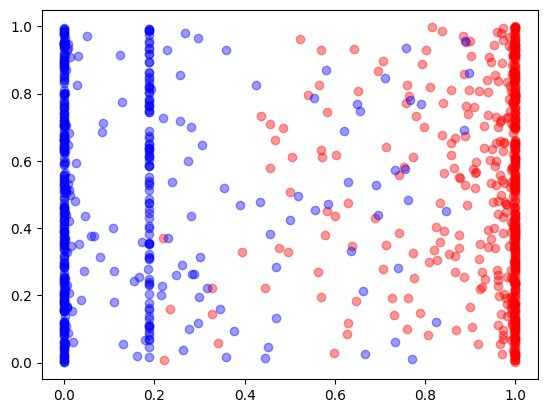

In [ ]:
s = 1 / (1 + np.exp(-z))

plt.figure()
plt.plot(s[0:N], np.random.rand(N), 'ro', alpha = 0.4, label = 'C1')
plt.plot(s[N:m], np.random.rand(m-N), 'bo', alpha = 0.4, label = 'C0')
# plt.ylim([-10,10])
plt.show()

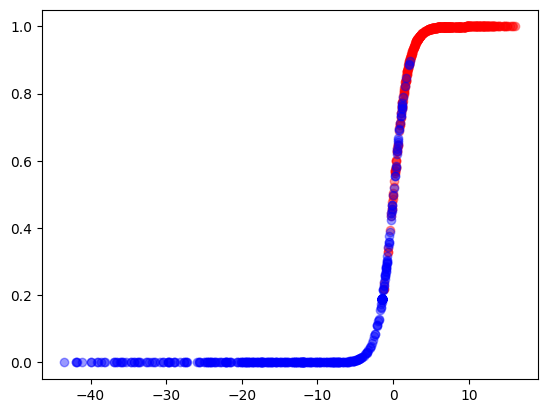

In [ ]:
s = 1 / (1 + np.exp(-z))

plt.figure()
plt.plot(z[0:N], s[0:N], 'ro', alpha = 0.4, label = 'C1')
plt.plot(z[N:m], s[N:m], 'bo', alpha = 0.4, label = 'C0')
# plt.ylim([-10,10])
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model using Sequential
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=2),
    nn.ReLU(),
    nn.Linear(in_features=2, out_features=1),
    nn.Sigmoid()
)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Define the loss function
loss_function = nn.BCELoss()

# Assuming train_X and train_y are your data tensors and are of appropriate type and shape
# Convert datasets to tensor if not already, and ensure they are floats for the inputs and floats for the labels (for BCELoss)
train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.FloatTensor(train_y).view(-1, 1)  # Ensuring the target tensor has the correct shape

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    output = model(train_X_tensor)
    loss = loss_function(output, train_y_tensor)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


Epoch 1, Loss: 0.7989906072616577
Epoch 2, Loss: 0.7046483159065247
Epoch 3, Loss: 0.634253978729248
Epoch 4, Loss: 0.5800594687461853
Epoch 5, Loss: 0.5354021787643433
Epoch 6, Loss: 0.5022120475769043
Epoch 7, Loss: 0.47930029034614563
Epoch 8, Loss: 0.46290886402130127
Epoch 9, Loss: 0.4486505687236786
Epoch 10, Loss: 0.4340258240699768
Epoch 11, Loss: 0.41826558113098145
Epoch 12, Loss: 0.40250927209854126
Epoch 13, Loss: 0.38879287242889404
Epoch 14, Loss: 0.3789353668689728
Epoch 15, Loss: 0.373637855052948
Epoch 16, Loss: 0.3726885914802551
Epoch 17, Loss: 0.3750501573085785
Epoch 18, Loss: 0.3791450560092926
Epoch 19, Loss: 0.38313573598861694
Epoch 20, Loss: 0.3857663869857788
Epoch 21, Loss: 0.3860359191894531
Epoch 22, Loss: 0.3836517930030823
Epoch 23, Loss: 0.3804404139518738
Epoch 24, Loss: 0.3770439326763153
Epoch 25, Loss: 0.37481099367141724
Epoch 26, Loss: 0.37346896529197693
Epoch 27, Loss: 0.3718910217285156
Epoch 28, Loss: 0.3691956102848053
Epoch 29, Loss: 0.36532

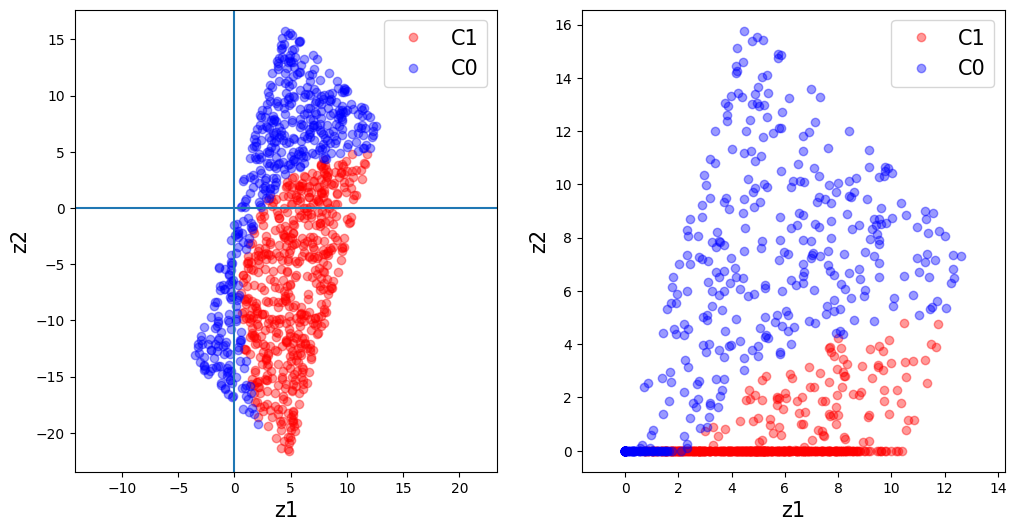

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Assuming model is your trained PyTorch model and train_X is your input tensor

# Extracting weights and biases from the PyTorch model
w1, b1 = model[0].weight.data.numpy(), model[0].bias.data.numpy()
w2, b2 = model[2].weight.data.numpy(), model[2].bias.data.numpy()

# Converting train_X to a numpy array for matrix operations
X = train_X

# Calculating logits manually
logits = np.dot(X, w1.T) + b1

# Applying the sigmoid function to logits
H = np.maximum(0, logits)  # ReLU operation

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(logits[:N, 0], logits[:N, 1], 'ro', alpha=0.4, label='C1')
plt.plot(logits[N:m, 0], logits[N:m, 1], 'bo', alpha=0.4, label='C0')
plt.xlabel('z1', fontsize=15)
plt.ylabel('z2', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.axis('equal')
plt.axhline(0)
plt.axvline(0)

plt.subplot(122)
plt.plot(H[:N, 0], H[:N, 1], 'ro', alpha=0.4, label='C1')
plt.plot(H[N:m, 0], H[N:m, 1], 'bo', alpha=0.4, label='C0')
plt.xlabel('z1', fontsize=15)
plt.ylabel('z2', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.axis('equal')

plt.show()


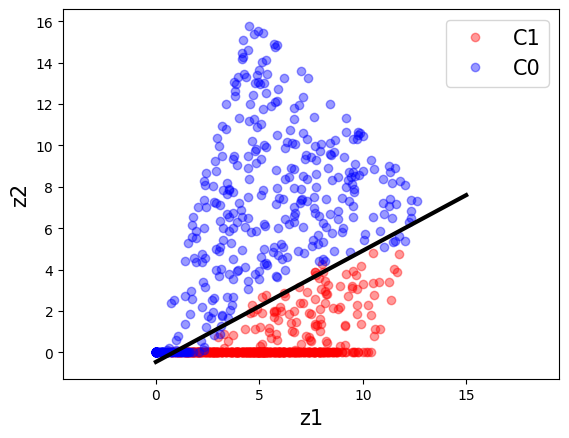

In [ ]:
x1p = np.arange(0, 15, 0.01).reshape(-1, 1)
x2p = - w2[0,0]/w2[0,1]*x1p - b2[0]/w2[0,1]

plt.figure()
plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.xlabel('z1', fontsize = 15)
plt.ylabel('z2', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.show()


<a name="section6"></a>
# ANN for MNIST

Write a pytorch code to train a two layer multi layer perceptron with 100 hidden neurons and ReLU activation for the MNIST dataset. The output layer undergoes softmax. Train and compare the model in the two ways using cross entropy loss or SVM loss.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations applied on each image
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Loading the MNIST dataset
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Data loaders for the training and test set
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Define the MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 100)  # First layer (input to hidden)
        self.fc2 = nn.Linear(100, 10)     # Second layer (hidden to output)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))  # ReLU activation function
        x = self.fc2(x)  # No activation, output raw scores
        return x

# Training with Cross Entropy Loss
print("Training with Cross Entropy Loss:")
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

epochs = 10  # Run for 10 epochs
# Training loop
model.train()
for epoch in range(epochs):
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Evaluation loop
model.eval()
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

accuracy = 100. * correct / len(test_loader.dataset)
print(f'Accuracy: {accuracy}%')

100%|██████████| 9912422/9912422 [00:00<00:00, 234274234.19it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 6866324.33it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 126725022.84it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 12011682.70it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Training with Cross Entropy Loss:
Epoch 1, Loss: 0.36904582381248474
Epoch 2, Loss: 0.03565218672156334
Epoch 3, Loss: 0.04776059836149216
Epoch 4, Loss: 0.022722072899341583
Epoch 5, Loss: 0.04632529243826866
Epoch 6, Loss: 0.026827525347471237
Epoch 7, Loss: 0.012849044054746628
Epoch 8, Loss: 0.011957306414842606
Epoch 9, Loss: 0.006663186941295862
Epoch 10, Loss: 0.0021506212651729584
Accuracy: 97.83%


## Barebones PyTorch

PyTorch ships with high-level APIs to help us define model architectures conveniently

Here is a table of comparison:

| API             | Flexibility | Convenience |
|-----------------|-------------|-------------|
| Barebone        | High        | Low         |
| `nn.Module`     | High        | Medium      |
| `nn.Sequential` | Low         | High        |

## Fashion MNIST

This tutorial is an official pytorch [tutorial link](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html).

This section runs through the API for common tasks in machine learning.
Refer to the links in each section to dive deeper.

Working with data
-----------------

PyTorch has two [primitives to work with
data](https://pytorch.org/docs/stable/data.html):
`torch.utils.data.DataLoader` and `torch.utils.data.Dataset`. `Dataset`
stores the samples and their corresponding labels, and `DataLoader`
wraps an iterable around the `Dataset`.

PyTorch offers domain-specific libraries such as
[TorchText](https://pytorch.org/text/stable/index.html),
[TorchVision](https://pytorch.org/vision/stable/index.html), and
[TorchAudio](https://pytorch.org/audio/stable/index.html), all of which
include datasets. For this tutorial, we will be using a TorchVision
dataset.

The `torchvision.datasets` module contains `Dataset` objects for many
real-world vision data like CIFAR, COCO ([full list
here](https://pytorch.org/vision/stable/datasets.html)). In this
tutorial, we use the FashionMNIST dataset. Every TorchVision `Dataset`
includes two arguments: `transform` and `target_transform` to modify the
samples and labels respectively.

We pass the `Dataset` as an argument to `DataLoader`. This wraps an
iterable over our dataset, and supports automatic batching, sampling,
shuffling and multiprocess data loading. Here we define a batch size of
64, i.e. each element in the dataloader iterable will return a batch of
64 features and labels.

Read more about [loading data in PyTorch](data_tutorial.html).



In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

100%|██████████| 26421880/26421880 [00:01<00:00, 18482187.72it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 337117.34it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6077975.14it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8585398.41it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


### Creating Models

To define a neural network in PyTorch, we create a class that inherits
from
[nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
We define the layers of the network in the `__init__` function and
specify how data will pass through the network in the `forward`
function. To accelerate operations in the neural network, we move it to
the GPU or MPS if available.


In [3]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Optimizing the Model Parameters

To train a model, we need a [loss
function](https://pytorch.org/docs/stable/nn.html#loss-functions) and an
[optimizer](https://pytorch.org/docs/stable/optim.html).

Read more about [building neural networks in
PyTorch](buildmodel_tutorial.html).

In a single training loop, the model makes predictions on the training
dataset (fed to it in batches), and backpropagates the prediction error
to adjust the model\'s parameters.

The training process is conducted over several iterations (*epochs*).
During each epoch, the model learns parameters to make better
predictions. We print the model\'s accuracy and loss at each epoch;
we\'d like to see the accuracy increase and the loss decrease with every
epoch.

Read more about [Training your model](optimization_tutorial.html).



In [4]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# We also check the model\'s performance against the test dataset to ensure it is learning.
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.299443  [   64/60000]
loss: 2.287823  [ 6464/60000]
loss: 2.263982  [12864/60000]
loss: 2.257423  [19264/60000]
loss: 2.239864  [25664/60000]
loss: 2.211805  [32064/60000]
loss: 2.217010  [38464/60000]
loss: 2.178788  [44864/60000]
loss: 2.174088  [51264/60000]
loss: 2.149692  [57664/60000]
Test Error: 
 Accuracy: 43.9%, Avg loss: 2.137349 

Epoch 2
-------------------------------
loss: 2.148538  [   64/60000]
loss: 2.135868  [ 6464/60000]
loss: 2.072832  [12864/60000]
loss: 2.092860  [19264/60000]
loss: 2.038023  [25664/60000]
loss: 1.982534  [32064/60000]
loss: 2.005593  [38464/60000]
loss: 1.918753  [44864/60000]
loss: 1.928521  [51264/60000]
loss: 1.863241  [57664/60000]
Test Error: 
 Accuracy: 54.3%, Avg loss: 1.853938 

Epoch 3
-------------------------------
loss: 1.894005  [   64/60000]
loss: 1.855408  [ 6464/60000]
loss: 1.734204  [12864/60000]
loss: 1.780894  [19264/60000]
loss: 1.673101  [25664/60000]
loss: 1.634756  [32064/600

### Saving Models
=============

A common way to save a model is to serialize the internal state
dictionary (containing the model parameters).


In [5]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


### Loading Models
==============

The process for loading a model includes re-creating the model structure
and loading the state dictionary into it.


In [6]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

This model can now be used to make predictions.


In [7]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


## Convert nn Module to Barebore Pytorch


In [8]:
import torch
import torch.nn.functional as F
from torch import nn
from torch import optim

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_size = 28*28
        self.hidden_size = 512
        self.output_size = 10

        # Initialize weights and biases for linear layers
        self.weight1 = nn.Parameter(torch.Tensor(self.hidden_size, self.input_size))
        self.bias1 = nn.Parameter(torch.Tensor(self.hidden_size))
        self.weight2 = nn.Parameter(torch.Tensor(self.hidden_size, self.hidden_size))
        self.bias2 = nn.Parameter(torch.Tensor(self.hidden_size))
        self.weight3 = nn.Parameter(torch.Tensor(self.output_size, self.hidden_size))
        self.bias3 = nn.Parameter(torch.Tensor(self.output_size))

        # Kaiming initialization for weights
        nn.init.kaiming_uniform_(self.weight1, nonlinearity='relu')
        nn.init.kaiming_uniform_(self.weight2, nonlinearity='relu')
        nn.init.kaiming_uniform_(self.weight3, nonlinearity='relu')

        # Initialize biases to zero
        nn.init.constant_(self.bias1, 0)
        nn.init.constant_(self.bias2, 0)
        nn.init.constant_(self.bias3, 0)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, self.input_size)

        # Apply the first linear layer and ReLU
        x = F.relu(F.linear(x, self.weight1, self.bias1))
        # Apply the second linear layer and ReLU
        x = F.relu(F.linear(x, self.weight2, self.bias2))
        # Apply the third linear layer
        logits = F.linear(x, self.weight3, self.bias3)

        return logits

# Assuming 'device' is defined elsewhere, e.g.,
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork().to(device)
print(model)

# Initialize the model, loss function, and optimizer
model = NeuralNetwork().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the training loop
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Define the testing loop
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')


NeuralNetwork()
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Epoch 1
-------------------------------
loss: 2.609449  [    0/60000]
loss: 0.506613  [ 6400/60000]
loss: 0.369534  [12800/60000]
loss: 0.496529  [19200/60000]
loss: 0.438098  [25600/60000]
loss: 0.387356  [32000/60000]
loss: 0.362906  [38400/60000]
loss: 0.508270  [44800/60000]
loss: 0.427108  [51200/60000]
loss: 0.489751  [57600/60000]
Test Error: 
 Accuracy: 85.0%, Avg loss: 0.406508 

Epoch 2
-------------------------------
loss: 0.259362  [    0/60000]
loss: 0.313750  [ 6400/60000]
loss: 0.288387  [12800/60000]
loss: 0.351414  [19200/60000]
loss: 0.468973  [25600/60000]
loss: 0.365109  [32000/60000]
loss: 0.310039  [38400/60000]
loss: 0.459350  [44800/60000]
loss: 0.365165  [51200/60000]
loss: 0.394600  [57600/60000]
Test Error: 
 Accuracy: 85.8%, Avg loss: 0.383051 

Epoch 3
-------------------------------
loss: 0.210027  [    0/60000]
loss: 0.279599  [ 6400/60000]
loss: 

<a name="section5"></a>
# Universal Approximation Theorem
Write an pytorch example code to explain universal approximation theorem of neutral networks as a tutorial.

The Universal Approximation Theorem essentially states that a feed-forward network with a single hidden layer containing a finite number of neurons can approximate any continuous function on compact subsets of
$\mathbb{R}^n$ , given appropriate weights and biases, and assuming the activation function is a non-constant, bounded, and monotonically-increasing continuous function.

To illustrate this with PyTorch, we'll approximate a simple function,
$f(x)=sin(x)$, using a neural network with one hidden layer. This example is meant for educational purposes to show the power of neural networks in function approximation.

### Define the Neural Network
We define a simple neural network with one hidden layer. The input and output layers have one neuron each (since
$f(x)$ is a function from $\mathbb{R}$ → $\mathbb{R}$), and we'll use a hidden layer with a customizable number of neurons. We'll use the ReLU activation function for this example.

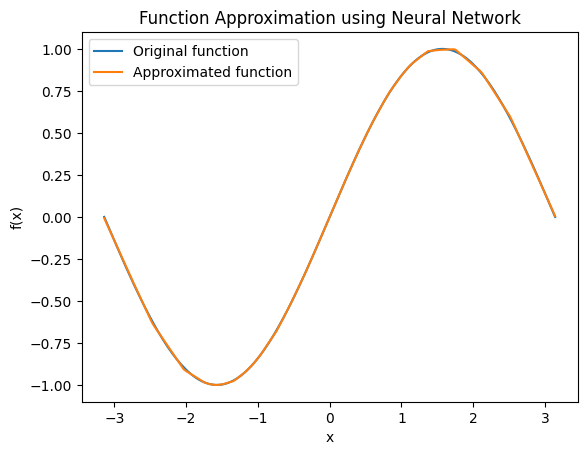

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)
y = torch.sin(x)

# Neural network definition
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Model instantiation
model = Net(hidden_size=50)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 2000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Results visualization
with torch.no_grad():
    predicted = model(x).detach().numpy()

# Original vs Approximated function plot
plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predicted, label='Approximated function')
plt.legend()
plt.title('Function Approximation using Neural Network')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


## Visualization of Neuron

Write an example code to visualize and explain each neuron's contribution.

To visualize and understand each neuron's contribution in our neural network, we can modify our approach slightly. One way to do this is by analyzing the output of the hidden layer neurons individually for given inputs. This involves feeding the input through the network up to the hidden layer and then observing the activations directly before they are passed through to the output layer.

Let's modify our neural network class to allow extracting the outputs of the hidden layer, and then visualize these activations alongside the final output to understand how each neuron in the hidden layer contributes to the final prediction.

### Step 1: Modify the Neural Network Class for Activation Extraction
We'll add a method to our Net class that allows us to get the activations from the hidden layer.

### Step 2: Instantiate the Model and Train (Reuse Previous Training Code)
We'll skip retraining here for brevity, assuming the model has already been trained. If you're following along, you can train this modified model using the same procedure as before.

### Step 3: Extract and Visualize Activations
After training, we can extract and visualize the activations to understand the contribution of each neuron.


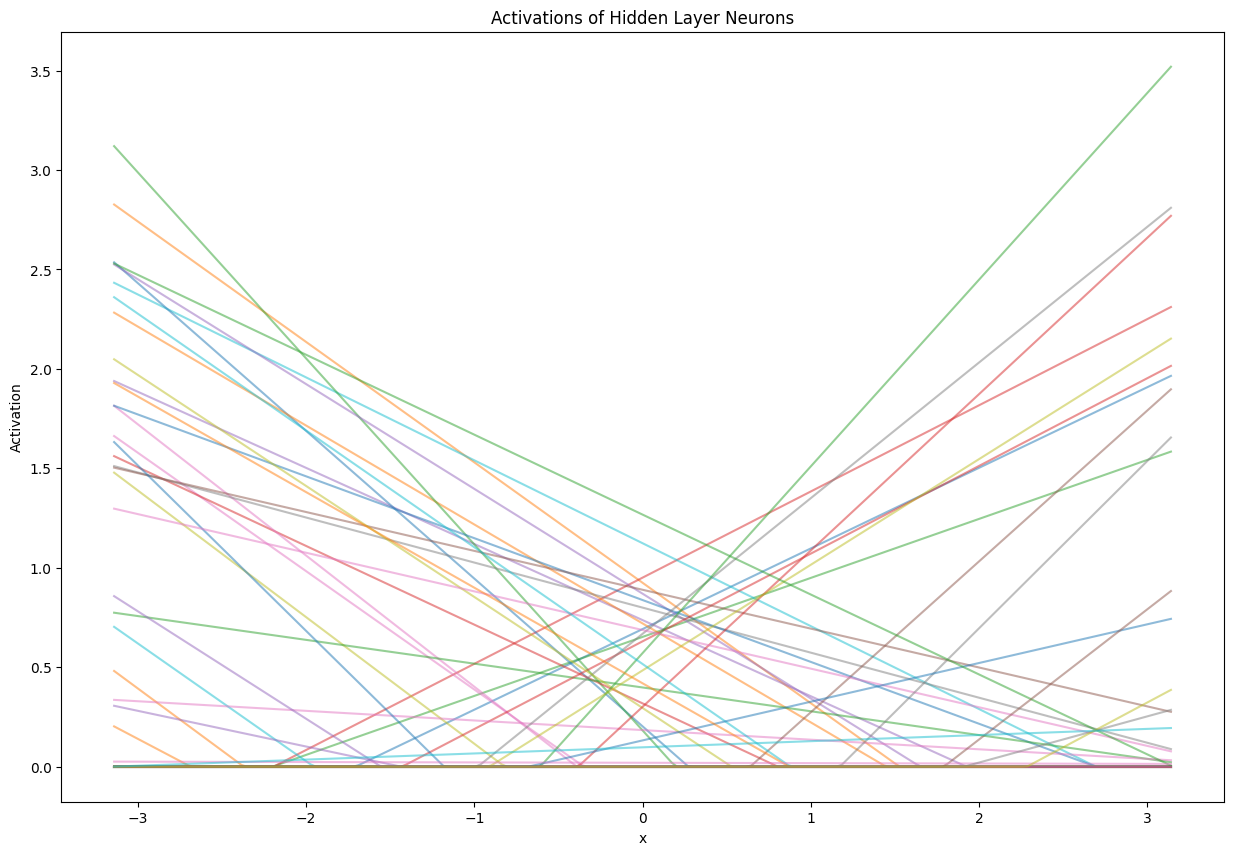

In [ ]:
# Re-importing necessary libraries and re-defining classes and functions after reset
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)

# Original neural network definition for reference
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, 1)  # Hidden to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Modified neural network definition for activation extraction
class NetWithActivations(Net):
    def __init__(self, hidden_size):
        super(NetWithActivations, self).__init__(hidden_size)

    def forward_with_activations(self, x):
        activations = torch.relu(self.fc1(x))
        output = self.fc2(activations)
        return output, activations

# Training setup
model = Net(hidden_size=50)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
y = torch.sin(x)
epochs = 2000
for epoch in range(epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Extract activations
model_with_activations = NetWithActivations(hidden_size=50)
model_with_activations.load_state_dict(model.state_dict())

with torch.no_grad():
    _, activations = model_with_activations.forward_with_activations(x)

# Visualizing activations
plt.figure(figsize=(15, 10))
for i in range(activations.size(1)):  # For each neuron in the hidden layer
    plt.plot(x.numpy(), activations[:, i].numpy(), alpha=0.5)

plt.title('Activations of Hidden Layer Neurons')
plt.xlabel('x')
plt.ylabel('Activation')
plt.show()


## Visualize the weight times activation

Visualize the weight times activation instead of just showing activtions

To visualize the weight times activation for each neuron in the hidden layer, we need to consider both the activations of these neurons and the weights of the connections between these neurons and the output neuron. This visualization can give us insight into the effective contribution of each neuron towards the final prediction, as it combines the activation strength with the importance of that activation as determined by the weights.

Let's modify the code to compute and visualize this "weighted activation" for each neuron in the hidden layer.

Step 1: Modify the Network Class for Weighted Activation Extraction
We don't need to modify our NetWithActivations class since we can use the existing forward_with_activations method. However, we will extract the weights from the second layer (fc2) to compute the weighted activations.

Step 2: Compute Weighted Activations
After obtaining the activations from the hidden layer, we multiply them by the corresponding weights from the connections to the output neuron.

Step 3: Visualize the Weighted Activations


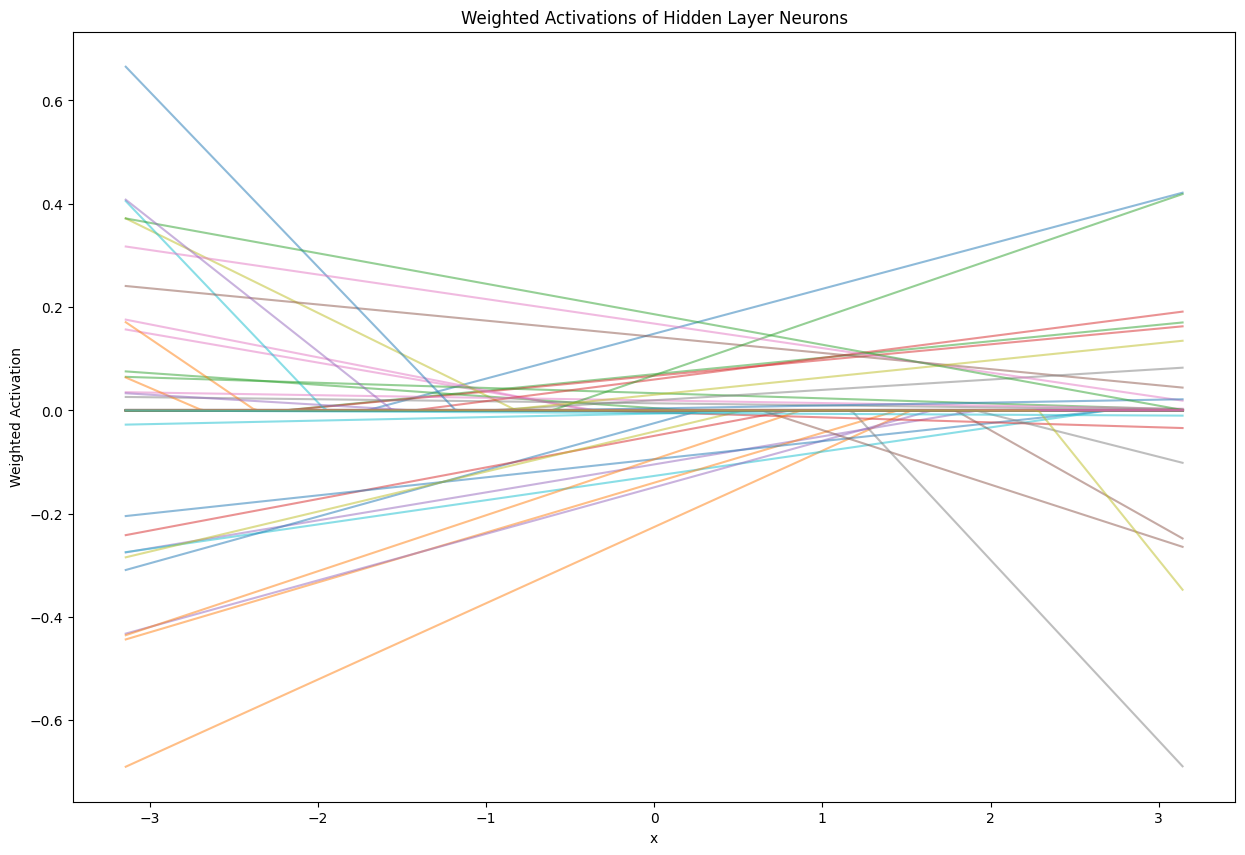

In [ ]:
# Assuming model_with_activations is already defined and has the trained weights

with torch.no_grad():
    _, activations = model_with_activations.forward_with_activations(x)

# Get the weights from the hidden layer to the output
weights_to_output = model_with_activations.fc2.weight.detach()

# Compute weighted activations
weighted_activations = activations * weights_to_output

# Visualizing weighted activations
plt.figure(figsize=(15, 10))
for i in range(weighted_activations.size(1)):
    plt.plot(x.numpy(), weighted_activations[:, i].numpy(), alpha=0.5)

plt.title('Weighted Activations of Hidden Layer Neurons')
plt.xlabel('x')
plt.ylabel('Weighted Activation')
plt.show()


## L2 Regularization

Write a code to explain and visualize the effect of regularization of the Net


Regularization techniques are used to prevent overfitting by penalizing large weights in the model. Common regularization methods include L1 (Lasso) and L2 (Ridge) regularization. Let's extend our neural network example to include L2 regularization, also known as weight decay, and visualize its effect on the training process and the final model.

Step 1: Define the Regularized Training Function
First, we'll define a function to train our model with L2 regularization. PyTorch's optimizers allow us to include L2 regularization directly via the weight_decay parameter.


In [ ]:
def train_model_with_regularization(model, criterion, optimizer, x, y, epochs=2000, weight_decay=0.01):
    for epoch in range(epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)

        # L2 Regularization is automatically applied through optimizer's weight_decay parameter
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



Step 2: Train Models With and Without Regularization
We'll compare two models: one trained with L2 regularization and another without.

In [ ]:
# Model without regularization
model_no_reg = NetWithActivations(hidden_size=50)
optimizer_no_reg = torch.optim.Adam(model_no_reg.parameters(), lr=0.01)
train_model_with_regularization(model_no_reg, criterion, optimizer_no_reg, x, y, epochs=2000, weight_decay=0)

# Model with regularization
model_with_reg = NetWithActivations(hidden_size=50)
optimizer_with_reg = torch.optim.Adam(model_with_reg.parameters(), lr=0.01, weight_decay=0.01)  # Including L2 regularization
train_model_with_regularization(model_with_reg, criterion, optimizer_with_reg, x, y, epochs=2000, weight_decay=0.01)


Epoch [100/2000], Loss: 0.0010
Epoch [200/2000], Loss: 0.0001
Epoch [300/2000], Loss: 0.0000
Epoch [400/2000], Loss: 0.0000
Epoch [500/2000], Loss: 0.0000
Epoch [600/2000], Loss: 0.0000
Epoch [700/2000], Loss: 0.0000
Epoch [800/2000], Loss: 0.0000
Epoch [900/2000], Loss: 0.0000
Epoch [1000/2000], Loss: 0.0000
Epoch [1100/2000], Loss: 0.0000
Epoch [1200/2000], Loss: 0.0000
Epoch [1300/2000], Loss: 0.0000
Epoch [1400/2000], Loss: 0.0000
Epoch [1500/2000], Loss: 0.0000
Epoch [1600/2000], Loss: 0.0000
Epoch [1700/2000], Loss: 0.0000
Epoch [1800/2000], Loss: 0.0000
Epoch [1900/2000], Loss: 0.0000
Epoch [2000/2000], Loss: 0.0000
Epoch [100/2000], Loss: 0.0219
Epoch [200/2000], Loss: 0.0114
Epoch [300/2000], Loss: 0.0095
Epoch [400/2000], Loss: 0.0090
Epoch [500/2000], Loss: 0.0088
Epoch [600/2000], Loss: 0.0087
Epoch [700/2000], Loss: 0.0086
Epoch [800/2000], Loss: 0.0086
Epoch [900/2000], Loss: 0.0086
Epoch [1000/2000], Loss: 0.0086
Epoch [1100/2000], Loss: 0.0086
Epoch [1200/2000], Loss: 0

Step 3: Visualize the Effects of Regularization
After training, we can visualize the final models' predictions to see the effect of regularization.

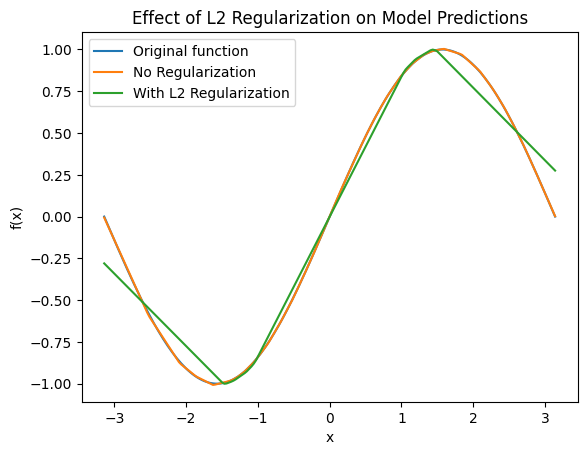

In [ ]:
with torch.no_grad():
    predictions_no_reg = model_no_reg(x).detach().numpy()
    predictions_with_reg = model_with_reg(x).detach().numpy()

plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predictions_no_reg, label='No Regularization')
plt.plot(x.numpy(), predictions_with_reg, label='With L2 Regularization')
plt.legend()
plt.title('Effect of L2 Regularization on Model Predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


The plot above shows the effect of L2 regularization on model predictions. We trained two models: one without regularization and one with L2 regularization. The model without regularization is optimized purely based on the training data, while the model with regularization is optimized to balance fitting the data and minimizing the size of the weights.

As seen in the plot, both models aim to approximate the original sine function, but the model trained with L2 regularization may demonstrate smoother predictions. This effect is particularly useful when dealing with more complex datasets where overfitting is a concern, as regularization helps the model generalize better to unseen data by discouraging overly complex models that fit the noise in the training set.

In this specific case, the effects might not be dramatically visible due to the simplicity of the function being approximated and the quality of the data (no noise), but in real-world scenarios with complex datasets, regularization can significantly improve the model's generalization capabilities.

## Visualize the contribution of each neuron

To visualize the contribution of each neuron in a model with regularization, we'll focus on the model that includes L2 regularization. We'll look into the "weighted activations" as we did previously, which combines the activation of each neuron with the weight of its connection to the output layer. This method provides a clear picture of how each neuron contributes to the final prediction, factoring in both the strength of its activation and the importance assigned by the model's learned weights.

We'll compute and visualize the weighted activations for the model trained with L2 regularization.

Step 1: Extract Weighted Activations
First, we extract the activations and then multiply them by the weights connecting each neuron in the hidden layer to the output layer.


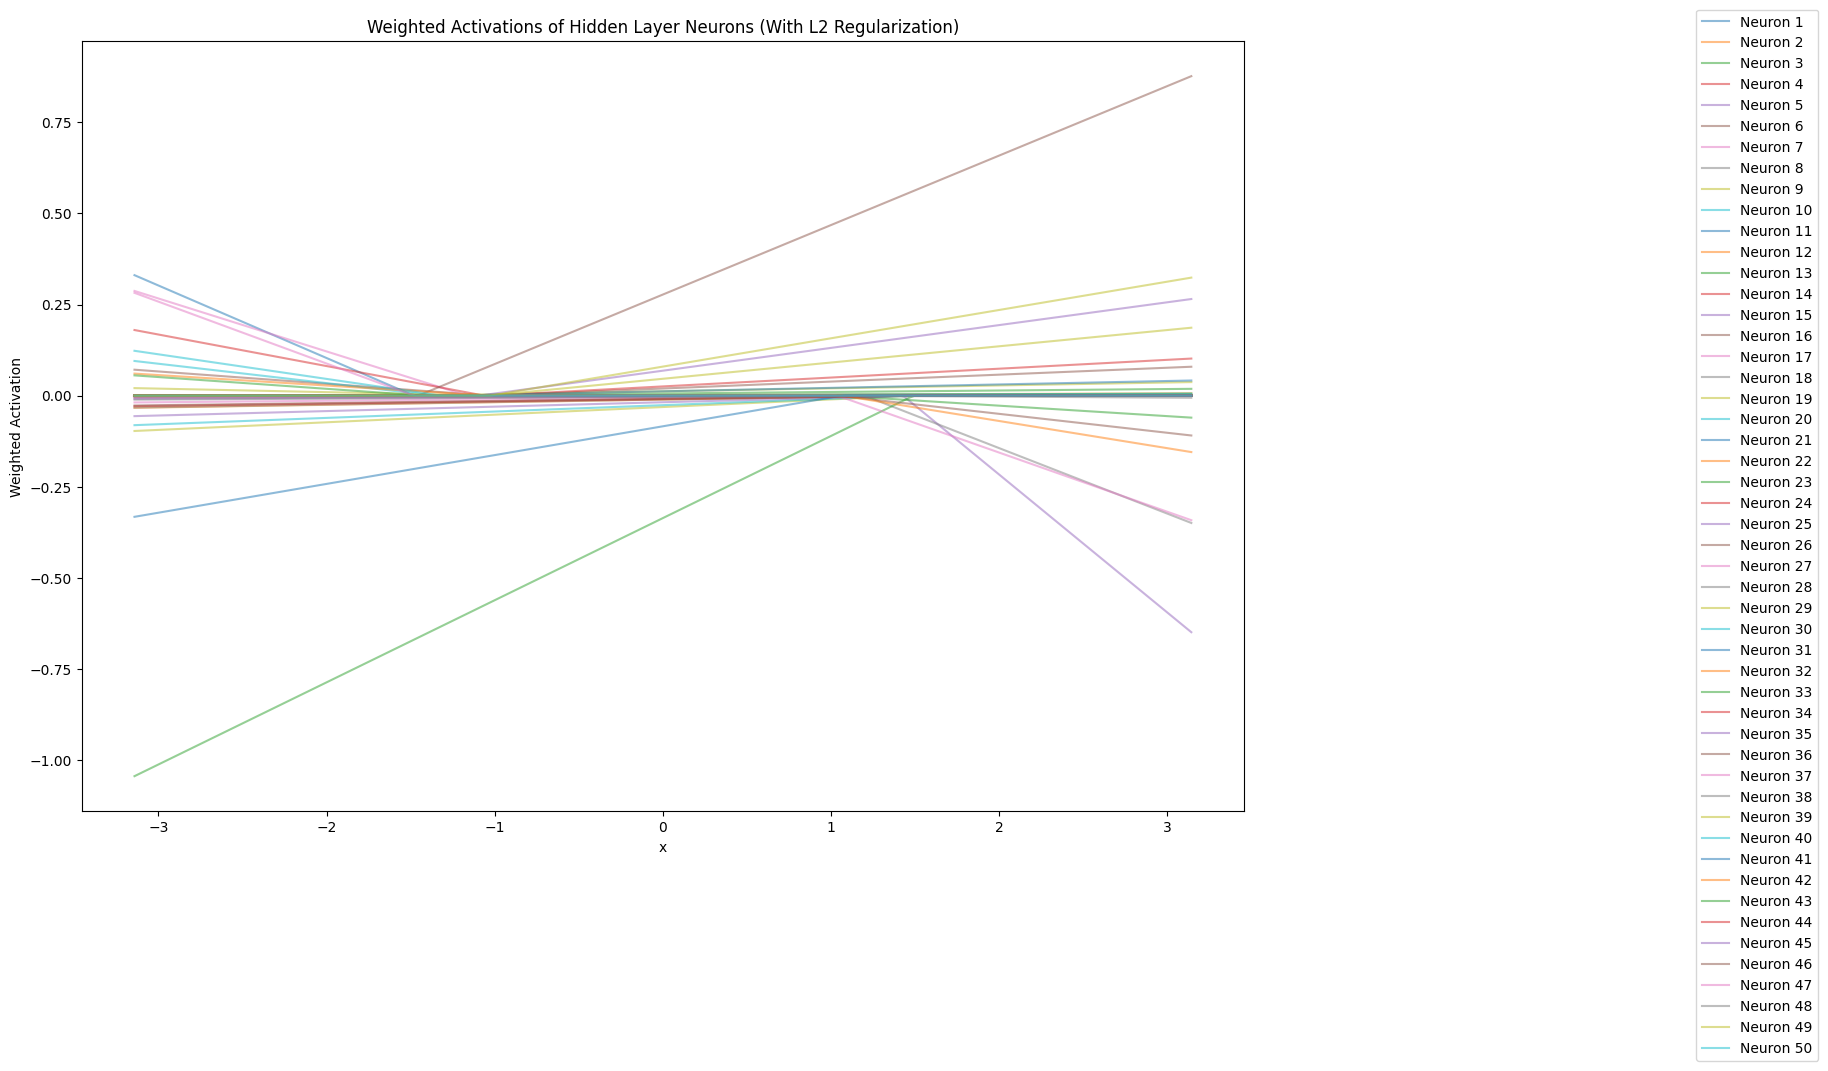

In [ ]:
with torch.no_grad():
    _, activations_with_reg = model_with_reg.forward_with_activations(x)
weights_to_output_reg = model_with_reg.fc2.weight.detach()

# Compute weighted activations for the regularized model
weighted_activations_with_reg = activations_with_reg * weights_to_output_reg.T.view(-1)

plt.figure(figsize=(15, 10))
for i in range(weighted_activations_with_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_with_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')

plt.title('Weighted Activations of Hidden Layer Neurons (With L2 Regularization)')
plt.xlabel('x')
plt.ylabel('Weighted Activation')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.05))
plt.show()
